In [1]:
import numpy as np
import matplotlib.pyplot as plt

import control as con

%pylab inline
#import plotly.plotly as py

import pandas as pd

from sysident import loadtools

Populating the interactive namespace from numpy and matplotlib


In [2]:
def latexify(fig_width=None, fig_height=None, columns=1):
    """Set up matplotlib's RC params for LaTeX plotting.
    Call this before plotting a figure.

    Parameters
    ----------
    fig_width : float, optional, inches
    fig_height : float,  optional, inches
    columns : {1, 2}
    """

    # code adapted from http://www.scipy.org/Cookbook/Matplotlib/LaTeX_Examples

    # Width and max height in inches for IEEE journals taken from
    # computer.org/cms/Computer.org/Journal%20templates/transactions_art_guide.pdf

    assert(columns in [1,2])

    if fig_width is None:
        fig_width = 3.39 if columns==1 else 6.9 # width in inches

    if fig_height is None:
        golden_mean = (sqrt(5)-1.0)/2.0    # Aesthetic ratio
        fig_height = fig_width*golden_mean # height in inches

    MAX_HEIGHT_INCHES = 8.0
    if fig_height > MAX_HEIGHT_INCHES:
        print("WARNING: fig_height too large:" + fig_height + 
              "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
        fig_height = MAX_HEIGHT_INCHES

    params = {'backend': 'ps',
              'text.latex.preamble': ['\usepackage{gensymb}'],
              'axes.labelsize': 8, # fontsize for x and y labels (was 10)
              'axes.titlesize': 8,
              'text.fontsize': 8, # was 10
              'legend.fontsize': 8, # was 10
              'xtick.labelsize': 8,
              'ytick.labelsize': 8,
              'text.usetex': True,
              'figure.figsize': [fig_width,fig_height],
              'font.family': 'serif'
    }

    matplotlib.rcParams.update(params)


def format_axes(ax):

    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color(SPINE_COLOR)
        ax.spines[spine].set_linewidth(0.5)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_tick_params(direction='out', color=SPINE_COLOR)

    return ax


In [3]:
folder = "/home/lth/catkin_ws/src/pitasc/applications/sysident/systems/"
#fname = folder+"ss1_20180724-082630_poles2_ident_pade1_0:036_control_20180724-092309.npy"
#fname = folder+"ss2_20180724-082631_poles3_ident_pade2_0:036_control_20180724-092409.npy"
#fname = folder+"ss3_position_20180717-104106_poles3_ident_pade1_0:032_control_20180724-092445.npy"
fname = folder+"ss5_20180724-082628_poles3_ident_pade1_0:032_control_20180724-092522.npy"
#fname = folder+"ss6_20180724-082629_poles4_ident_pade2_0:032_control_20180724-092618.npy"

In [4]:
res, _ = loadtools.loadNPY(fname)
#res.keys()

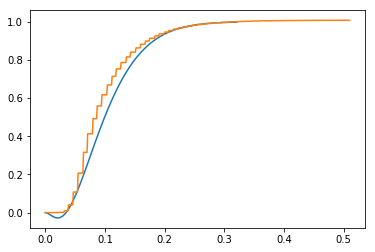

In [5]:
plt.plot(*res['plot_model_step'])
plt.plot(*res['plot_input_step'])

#py.iplot(res['plot_model_step'])

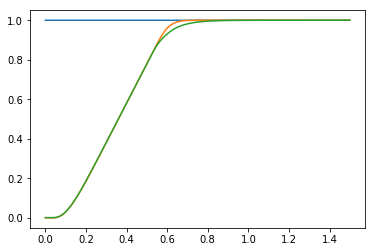

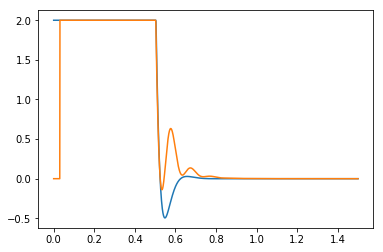

In [6]:
plt.plot(*res['plot_control_step_s'])
plt.plot(*res['plot_control_step_y'])
plt.plot(*res['plot_control_step_delay_y'])
plt.show()

plt.plot(*res['plot_control_step_u'])
plt.plot(*res['plot_control_step_delay_u'])
plt.show()

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family [u'serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


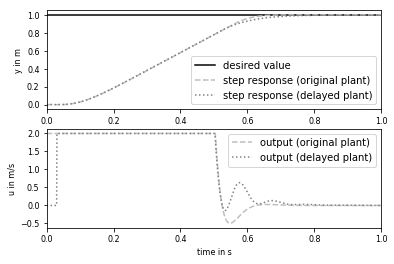

In [7]:
plt.rc('font', family='serif', serif='Times')
#plt.rc('font', family='serif')
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=8)

# width as measured in inkscape
width = 3.487
height = width / 1.618

#fig = plt.figure(figsize=(4, 3))
#fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

#print res['plot_control_step_s'][0]
ax = plt.subplot(111)    # The big subplot

ax1 = plt.subplot(2, 1, 1)
#plt.plot(res['plot_control_step_y'][0],
#         res['plot_control_step_y'][1],
#         label='step data',
#         color='0.5', ls='solid')

plt.plot(*res['plot_control_step_s'],
         label='desired value',
         color='k', ls='solid')

plt.plot(*res['plot_control_step_y'],
         label='step response (original plant)',
         color='0.75', ls='dashed')

plt.plot(*res['plot_control_step_delay_y'],
         label='step response (delayed plant)',
         color='0.5', ls='dotted')

ax1.set_ylabel('y in m')

plt.xlim(0, 1)
legend()

ax2 = plt.subplot(2, 1, 2)

plt.plot(*res['plot_control_step_u'],
         label='output (original plant)',
         color='0.75', ls='dashed')

plt.plot(*res['plot_control_step_delay_u'],
         label='output (delayed plant)',
         color='0.5', ls='dotted')

plt.xlim(0, 1)
legend()

ax2.set_ylabel('u in m/s')
ax2.set_xlabel('time in s')

#fig.set_size_inches(width, height)
plt.savefig('sim_response.pdf')
#plt.show()

In [8]:
import pandas as pd
df = pd.read_csv("/home/lth/catkin_ws/src/pitasc/applications/sysident/src/2018-07-27_16-13-30_task_vel_logger.csv")
df['time'] = (df['time'])*1e-9
df['time'] = df['time']-df['time'].values[0]
#print df['time'].values[0]
#data_all[0] = data_all[0]*1e-9 # to seconds
#data_all[0] = data_all[0]-data_all[0][0] # starts at 0

df.set_index('time', inplace=True)
df.drop(columns=['localtime'], inplace=True)

df.head()
#(df.residual - df.task_vel).plot()

,residual,desired_vel,task_vel,control_out,state
time,,,,,
0.000000,-4.163336e-17,-1.225869e-16,4.951835e-06,-1.225869e-16,"""unknown"""
0.004759,-2.140294e-07,-6.301965e-07,-4.951773e-06,-6.301965e-07,"""unknown"""
0.013541,2.140284e-07,6.301940e-07,-9.903561e-06,6.301936e-07,"""unknown"""
0.023540,4.280578e-07,1.260390e-06,1.462214e-11,1.260390e-06,"""unknown"""
0.028151,1.284175e-06,3.781176e-06,-4.951792e-06,3.781174e-06,"""unknown"""


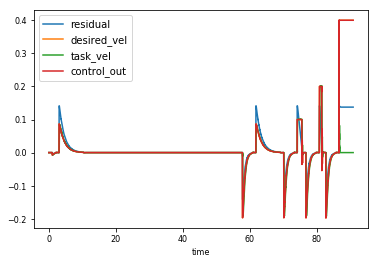

In [9]:
df.plot()

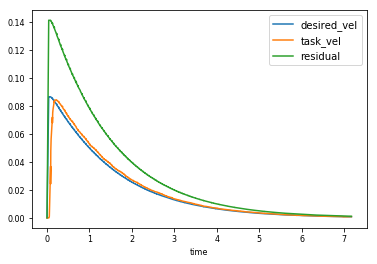

In [10]:
df_linear = df.loc[(df.index > 61.8) & (df.index < 69), ['desired_vel','task_vel','residual']]
df_linear.index = df_linear.index - df_linear.index[0]
df_linear.plot()

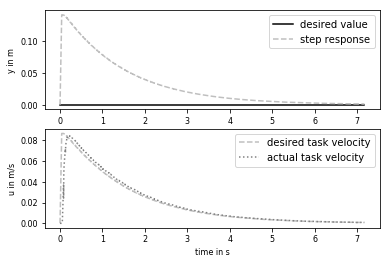

In [11]:
plt.rc('font', family='serif', serif='Times')
#plt.rc('font', family='serif')
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=8)

# width as measured in inkscape
width = 3.487
height = width / 1.618

ax1 = plt.subplot(2, 1, 1)
plt.plot(df_linear.index,
         np.zeros(len(df_linear.index)),
         label='desired value',
         color='k', ls='solid')

plt.plot(df_linear.index,
         df_linear.residual,
         label='step response',
         color='0.75', ls='dashed')

#plt.xlim(0, 1.2)
legend()

ax2 = plt.subplot(2, 1, 2)

plt.plot(df_linear.index,
         df_linear.desired_vel,
         label='desired task velocity',
         color='0.75', ls='dashed')

plt.plot(df_linear.index,
         df_linear.task_vel,
         label='actual task velocity',
         color='0.5', ls='dotted')

#plt.xlim(0, 0.8)
legend()

ax1.set_ylabel('y in m')
ax2.set_ylabel('u in m/s')
ax2.set_xlabel('time in s')

plt.savefig('experiement_lin_control_1.pdf')


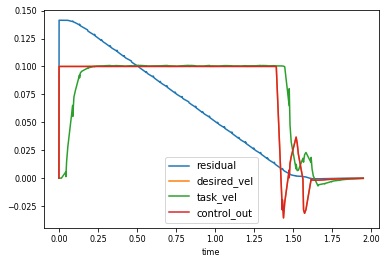

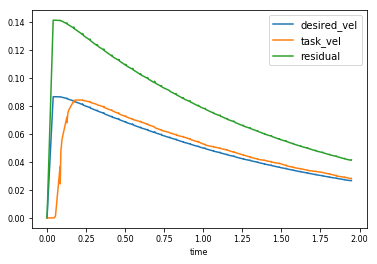

In [12]:
df_lens_01 = df.loc[(df.index > 74.12) & (df.index < 76.12)]
df_lens_01.index = df_lens_01.index - df_lens_01.index[0]
df_lens_01.plot()

df_linear_cut = df_linear.loc[(df_linear.index < df_lens_01.index[-1])]
df_linear_cut.plot()

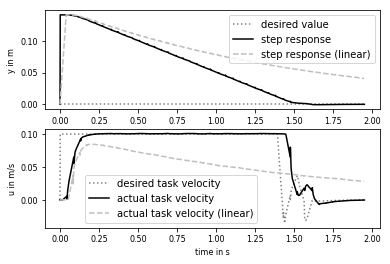

In [13]:
plt.rc('font', family='serif', serif='Times')
#plt.rc('font', family='serif')
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=8)

# width as measured in inkscape
width = 3.487
height = width / 1.618

ax1 = plt.subplot(2, 1, 1)
plt.plot(df_lens_01.index,
         np.zeros(len(df_lens_01.index)),
         label='desired value',
         color='0.5', ls='dotted')

plt.plot(df_lens_01.index,
         df_lens_01.residual,
         label='step response',
         color='k', ls='solid')

plt.plot(df_linear_cut.index,
         df_linear_cut.residual,
         label='step response (linear)',
         color='0.75', ls='dashed')

#plt.xlim(0, 1.2)
legend(loc = 'upper right')

ax2 = plt.subplot(2, 1, 2)

plt.plot(df_lens_01.index,
         df_lens_01.desired_vel,
         label='desired task velocity',
         color='0.5', ls='dotted')

plt.plot(df_lens_01.index,
         df_lens_01.task_vel,
         label='actual task velocity',
         color='k', ls='solid')

plt.plot(df_linear_cut.index,
         df_linear_cut.task_vel,
         label='actual task velocity (linear)',
         color='0.75', ls='dashed')

#plt.xlim(0, 0.8)
leg = legend()

# Get the bounding box of the original legend
bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)

# Change to location of the legend. 
xOffset = -0.3
#bb.x0 += xOffset
bb.x1 += xOffset
leg.set_bbox_to_anchor(bb, transform = ax.transAxes)


ax1.set_ylabel('y in m')
ax2.set_ylabel('u in m/s')
ax2.set_xlabel('time in s')

plt.savefig('experiement_len01_1.pdf')

#plt.subplot(2, 1, 1)
#plt.plot(df_linear.index,
#         df_linear.residual,
#         label='step response',
#         color='0.5', ls='dotted')
#
#plt.xlim(0, 1.2)
#legend()
#
#plt.subplot(2, 1, 2)
#
#plt.plot(df_linear.index,
#         df_linear.desired_vel,
#         label='desired task velocity',
#         color='0.75', ls='dashed')
#
#plt.plot(df_linear.index,
#         df_linear.task_vel,
#         label='actual task velocity',
#         color='0.5', ls='dotted')
#plt.savefig('experiement_all_1.pdf')


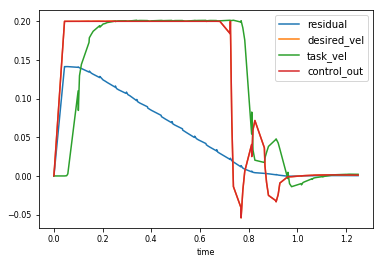

In [14]:
df_lens_02 = df.loc[(df.index > 80.74) & (df.index < 82)]
df_lens_02.index = df_lens_02.index - df_lens_02.index[0]
df_lens_02.plot()

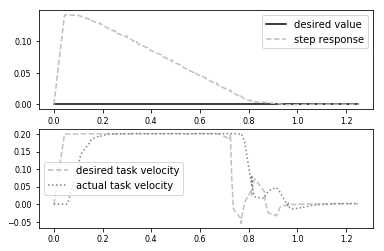

In [15]:
plt.rc('font', family='serif', serif='Times')
#plt.rc('font', family='serif')
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=8)

# width as measured in inkscape
width = 3.487
height = width / 1.618

plt.subplot(2, 1, 1)
plt.plot(df_lens_02.index,
         np.zeros(len(df_lens_02.index)),
         label='desired value',
         color='k', ls='solid')

plt.plot(df_lens_02.index,
         df_lens_02.residual,
         label='step response',
         color='0.75', ls='dashed')

#plt.xlim(0, 1.2)
legend()

plt.subplot(2, 1, 2)

plt.plot(df_lens_02.index,
         df_lens_02.desired_vel,
         label='desired task velocity',
         color='0.75', ls='dashed')

plt.plot(df_lens_02.index,
         df_lens_02.task_vel,
         label='actual task velocity',
         color='0.5', ls='dotted')

#plt.xlim(0, 0.8)
legend()

plt.savefig('experiement_len02_1.pdf')


In [16]:
import pandas as pd
df = pd.read_csv("/home/lth/catkin_ws/src/pitasc/applications/sysident/src/2018-07-27_16-08-44_task_vel_logger.csv")
df['time'] = (df['time'])*1e-9
df['time'] = df['time']-df['time'].values[0]
#print df['time'].values[0]
#data_all[0] = data_all[0]*1e-9 # to seconds
#data_all[0] = data_all[0]-data_all[0][0] # starts at 0

df.set_index('time', inplace=True)
df.drop(columns=['localtime'], inplace=True)

df.head()
#(df.residual - df.task_vel).plot()

,residual,desired_vel,task_vel,control_out,state
time,,,,,
0.000000,1.387779e-17,4.086230e-17,9.910919e-06,4.086230e-17,"""unknown"""
0.007237,-6.654363e-07,-1.959337e-06,-5.291751e-07,-1.959337e-06,"""unknown"""
0.015019,-4.055032e-07,-1.193980e-06,-2.920355e-05,-1.193979e-06,"""unknown"""
0.023342,-8.567520e-07,-2.522652e-06,-9.381753e-06,-2.522654e-06,"""unknown"""
0.031157,-8.796243e-07,-2.589999e-06,-9.910916e-06,-2.590000e-06,"""unknown"""


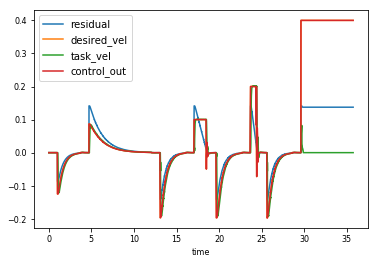

In [17]:
df.plot()

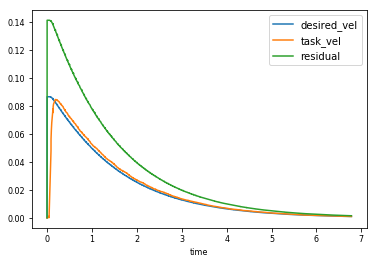

In [18]:
df_linear = df.loc[(df.index > 4.7) & (df.index < 11.5), ['desired_vel','task_vel','residual']]
df_linear.index = df_linear.index - df_linear.index[0]
df_linear.plot()

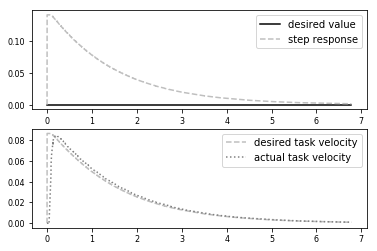

In [19]:
plt.rc('font', family='serif', serif='Times')
#plt.rc('font', family='serif')
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=8)

# width as measured in inkscape
width = 3.487
height = width / 1.618

plt.subplot(2, 1, 1)
plt.plot(df_linear.index,
         np.zeros(len(df_linear.index)),
         label='desired value',
         color='k', ls='solid')

plt.plot(df_linear.index,
         df_linear.residual,
         label='step response',
         color='0.75', ls='dashed')

#plt.xlim(0, 1.2)
legend()

plt.subplot(2, 1, 2)

plt.plot(df_linear.index,
         df_linear.desired_vel,
         label='desired task velocity',
         color='0.75', ls='dashed')

plt.plot(df_linear.index,
         df_linear.task_vel,
         label='actual task velocity',
         color='0.5', ls='dotted')

#plt.xlim(0, 0.8)
legend()

plt.savefig('experiement_lin_control_2.pdf')


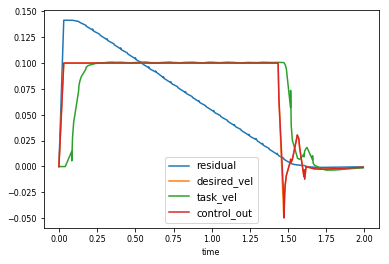

In [20]:
df_lens_01 = df.loc[(df.index > 17.03) & (df.index < 19.03)]
df_lens_01.index = df_lens_01.index - df_lens_01.index[0]
df_lens_01.plot()

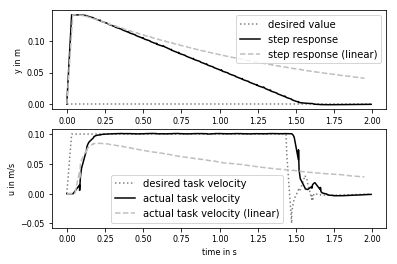

In [21]:
plt.rc('font', family='serif', serif='Times')
#plt.rc('font', family='serif')
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=8)

# width as measured in inkscape
width = 3.487
height = width / 1.618

ax1 = plt.subplot(2, 1, 1)
plt.plot(df_lens_01.index,
         np.zeros(len(df_lens_01.index)),
         label='desired value',
         color='0.5', ls='dotted')

plt.plot(df_lens_01.index,
         df_lens_01.residual,
         label='step response',
         color='k', ls='solid')

plt.plot(df_linear_cut.index,
         df_linear_cut.residual,
         label='step response (linear)',
         color='0.75', ls='dashed')

#plt.xlim(0, 1.2)
legend(loc = 'upper right')

ax2 = plt.subplot(2, 1, 2)

plt.plot(df_lens_01.index,
         df_lens_01.desired_vel,
         label='desired task velocity',
         color='0.5', ls='dotted')

plt.plot(df_lens_01.index,
         df_lens_01.task_vel,
         label='actual task velocity',
         color='k', ls='solid')

plt.plot(df_linear_cut.index,
         df_linear_cut.task_vel,
         label='actual task velocity (linear)',
         color='0.75', ls='dashed')

#plt.xlim(0, 0.8)
leg = legend()

# Get the bounding box of the original legend
bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)

# Change to location of the legend. 
xOffset = -0.3
#bb.x0 += xOffset
bb.x1 += xOffset
leg.set_bbox_to_anchor(bb, transform = ax.transAxes)


ax1.set_ylabel('y in m')
ax2.set_ylabel('u in m/s')
ax2.set_xlabel('time in s')

plt.savefig('experiement_len01_2.pdf')

#plt.subplot(2, 1, 1)
#plt.plot(df_linear.index,
#         df_linear.residual,
#         label='step response',
#         color='0.5', ls='dotted')
#
#plt.xlim(0, 1.2)
#legend()
#
#plt.subplot(2, 1, 2)
#
#plt.plot(df_linear.index,
#         df_linear.desired_vel,
#         label='desired task velocity',
#         color='0.75', ls='dashed')
#
#plt.plot(df_linear.index,
#         df_linear.task_vel,
#         label='actual task velocity',
#         color='0.5', ls='dotted')
#plt.savefig('experiement_all_1.pdf')


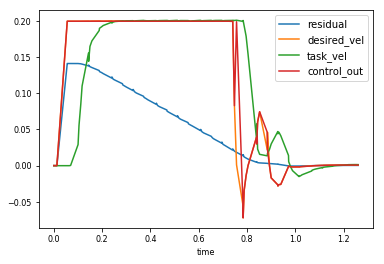

In [22]:
df_lens_02 = df.loc[(df.index > 23.6) & (df.index < 24.9)]
df_lens_02.index = df_lens_02.index - df_lens_02.index[0]
df_lens_02.plot()

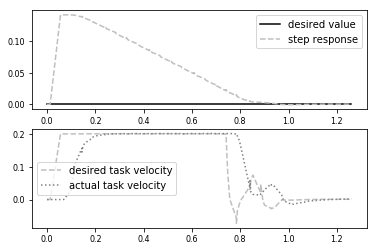

In [23]:
plt.rc('font', family='serif', serif='Times')
#plt.rc('font', family='serif')
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=8)

# width as measured in inkscape
width = 3.487
height = width / 1.618

plt.subplot(2, 1, 1)
plt.plot(df_lens_02.index,
         np.zeros(len(df_lens_02.index)),
         label='desired value',
         color='k', ls='solid')

plt.plot(df_lens_02.index,
         df_lens_02.residual,
         label='step response',
         color='0.75', ls='dashed')

#plt.xlim(0, 1.2)
legend()

plt.subplot(2, 1, 2)

plt.plot(df_lens_02.index,
         df_lens_02.desired_vel,
         label='desired task velocity',
         color='0.75', ls='dashed')

plt.plot(df_lens_02.index,
         df_lens_02.task_vel,
         label='actual task velocity',
         color='0.5', ls='dotted')

#plt.xlim(0, 0.8)
legend()

plt.savefig('experiement_len02_2.pdf')
